# Mushroom Classification -Safe to eat or deadly poison?-

[Kaggle](https://www.kaggle.com/uciml/mushroom-classification)  


In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns


In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}
pd.set_option("display.max_rows", 10)

In [3]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
print(df.isnull().sum().values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df2 = pd.get_dummies(df)
df2

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
y = df2.iloc[:,0].values
X = df2.iloc[:,2:].values
c_name = df2.columns


In [37]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0)

In [56]:
len(X_train)

406

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
tree.fit(np.array(X_train), np.array(y_train))

print(np.round(tree.score(X_test, y_test),3)*100)


99.7


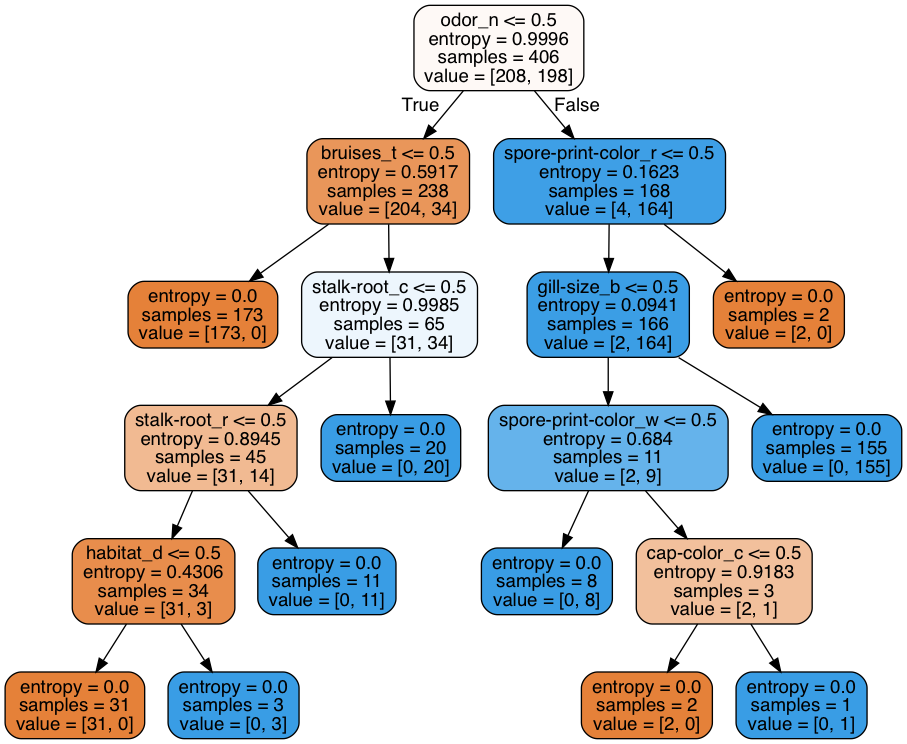

In [39]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True,rounded=True,feature_names=c_name[2:])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [49]:
from sklearn import metrics
y_pred= tree.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[3708,    0],
       [  24, 3986]])

In [50]:
print(np.round(tree.score(X_test, y_test),3)*100)

99.7


## Logistic regression

In [51]:
from Plot_decision_regions import PlotDecisionRegions 
plot_decision_regions = PlotDecisionRegions.plot_decision_regions

In [52]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [53]:
print(np.round(lr.score(X_test, y_test),3)*100)

99.4


In [54]:
from sklearn import metrics
y_pred= lr.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)

array([[3697,   11],
       [  33, 3977]])